# Exploratory Data Analysis

## Project Description

In this project, I will be doing research on Car Sale ads posted on **Crankshaft List**. Hundreds of free advertisements for vehicles are published on Crankshaft List website every day. I will be studying data collected over the last few years and determine which factors influence the price of a vehicle. 

I will be performing the following task to in order to accomplish my goal in this project:
> Loading the dataset and studying general information.
> Data Preprocessing
- Identify and study missing values
- Filling in missing values when possible
- Converting data to the required datatypes
> Performing Calculation, replacing values in some columns and adding new columns to the table
- calculating and adding new columns: Day of week, month and year the ad was placed
- calculating  vehicle's age in years when the ad was placed and adding it to column
- calculating vehicles average mileage per year and adding it to table
- Replacing string values with a numeric scale in **condition** column.
> Carrying out exploratory data analysis
- plotting histogram for price, vehicle's age when the ad was placed, mileage, number if cylinders and condition and study the outlier and its affect in form and readability of histogram.
- Determining the upper limits of outliers, remove the outliers and store them in a separate DataFrame
- Using the filtered data to plot new histograms. Comparing them with the earlier histograms (the ones that included outliers). Drawing conclusions for each histogram.
- Studying how many days advertisements were displayed (days_listed). Ploting a histogram. Calculating the mean and median. Describing the typical lifetime of an ad. Determining when ads were removed quickly, and when they were listed for an abnormally long time.
- Analyzing the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.
- Determining the factors that impact the price most. Studying whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plotting box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.
> Drawing conclusion on each analysis



# Step 1. Open the data file and study the general information. 

#### Importing necessary python libraries

In [107]:
import pandas as pd
import numpy as np
import random
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt



#### Reading CSV file containing our dataset

In [108]:
try:
    df = pd.read_csv("/Users/rsavy/Downloads/vehicles_us.csv")
    
except:
    df = pd.read_csv("/datasets/vehicles_us.csv") 

#### Printing first five rows of dataset to get general ideas on how data looks like

In [157]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,white,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,white,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


#### Observing the datatypes and total entries in each columns

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


#### Observing count and percentage of  missing values in each columns

In [160]:
count = df.isnull().sum()
percent = (count / df.shape[0]) * 100
print('Following are the count of Missing values in each columns of dataset:',count)
print()
print('Following are the percent of Missing values in each columns of dataset:',percent)

Following are the count of Missing values in each columns of dataset: price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Following are the percent of Missing values in each columns of dataset: price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color      0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64


#### Statistical Summary

In [161]:
print('Following are the general Statistical Summary of the dataset:')
df.describe()

Following are the general Statistical Summary of the dataset:


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,51525.000000,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,0.496303,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.499991,28.20427
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,0.000000,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000


In [162]:
print('There are',df.duplicated().sum(), 'duplicate values in dataset')

There are 0 duplicate values in dataset


### Conclusion

1. We will be dealing with various datatypes in this dataset. We will need to change some datatypes into appropriate format such as **model_year** and **date_posted** into datetime from float and object datatypes respectively.

2. We have missing values in the follwing columns and we will be filling in missing values where it is possible to do so:
    - **model_year**
    - **odometer**
    - **is_4wd**
    - **paint_color**
    - **cylinders**
3. We observed the general statistical summary of the dataset.
4. We do not have any duplicates in the dataset.

# Step 2. Data preprocessing

#### Handling Missing Values

Lets have a quick look on missing values columns again.

In [163]:
df.isnull().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Firstly, I am filling up missing values in **is_4wd** column as we know that the column is supposed to be boolean (which I will be changing the datatype later), there are 2 possible values **0** or **1** where 0= false for 4wd and 1=True for 4wd.

In [164]:
df['is_4wd'] = df['is_4wd'].fillna(value=0)

In [165]:
df.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,white,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,white,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


Now when we compare this dataframe with previous dataframe we can see **NaN** values in **is_4wd** are replaced with 0 (which means False in a real scenerio).

I want to fill in **paint_color** of the dataset with random color generated from among the colors we have in **paint_color** dataset. As paint color is not very important factor in this analysis, filling in random values wont make much affect in our final analysis and also we can get rid of missing values.

In [166]:
def fill_color(df):
    unique_color = df['paint_color'].unique()
    unique_color = list(filter(lambda x: x==x, unique_color))
    df['paint_color'].fillna(random.choice(unique_color), inplace=True)
fill_color(df)

Now, I am filling in missing values in **cylinders** with mode value which is most repeated values. As cars have specific number of cylinders it would be better to use Mode or most frequent value intead of median or mean. For that I will first group the cars by models and use most frequent cylinder in each model.

In [246]:
def fill_cylinder(df):
    for name, group in df.groupby(by=['type'])['cylinders']:
        groupMode = group.dropna().mode().values[0]
        df.loc[(df['type'] == name) & (df['cylinders'] != df['cylinders']), 'cylinders'] = groupMode
    df['cylinders'] = df['cylinders'].astype(int)
fill_cylinder(df)

**Data Slice to remove rows with NaN value in model_year**

I have decided to delete the rows where **model_year** has missing values. As **model_year** has **3619** missing values that is 7% of whole data. If there are less than 10% of missing values, assuming that it is safe to delete those values, I am dropping those using data slicing method.

In [247]:
data = df.query('model_year != "NaN"').reset_index()

In [248]:
data.head()

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,white,1.0,2018-06-23,19
1,2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
2,3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,white,0.0,2019-03-22,9
3,4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
4,5,14990,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


I am filling in missing values for odometer in later section when I calculate the age of the vehicle when it was posted.

#### Changing Data Types

In [249]:
data['model_year'] = pd.to_datetime(data['model_year'], format = '%Y')

In [250]:
data['is_4wd'] = data['is_4wd'].astype(bool)

In [251]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format = '%Y-%m-%d')

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47906 entries, 0 to 47905
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         47906 non-null  int64         
 1   price         47906 non-null  int64         
 2   model_year    47906 non-null  datetime64[ns]
 3   model         47906 non-null  object        
 4   condition     47906 non-null  object        
 5   cylinders     47906 non-null  int32         
 6   fuel          47906 non-null  object        
 7   odometer      40563 non-null  float64       
 8   transmission  47906 non-null  object        
 9   type          47906 non-null  object        
 10  paint_color   47906 non-null  object        
 11  is_4wd        47906 non-null  bool          
 12  date_posted   47906 non-null  datetime64[ns]
 13  days_listed   47906 non-null  int64         
dtypes: bool(1), datetime64[ns](2), float64(1), int32(1), int64(3), object(6)
memory usage:

### Conclusion
#### Handing Missing Values:
1. I filled in missing values in **is_4wd** column with **0** as there are 2 possible values 0 or 1 in boolean datatype.
2. I filled in missing values in **paint_color** column with random color generated from among the colors we have in **paint_color** dataset. As paint color is not very important factor in this analysis, filling in random values will not make much affect in our final analysis.
3. I filled in missing values in **cylinders** with **Mode** value which is most repeated values. I grouped the cars by models and used most frequent cylinder in each model to fill in missing values.
4. I dropped missing values in **model_year** column as there were 7% of missing values assuming that deleting 7% of missing values does not affect our final analysis.
5. I will fill in missing values in **odometer** column after calculating **vehicle's age** in next step.

#### Converting Datatypes:
I converted **model_year** and **date_posted** to datetime datatype, **cylinders** into int32, and **is_4wd** into Boolean.


# Step 3. Make calculations and add them to the table

Calculating Day of the week, month, and year the ad was placed and adding it to table

Also, calculating vehicle's age (in years) when the ad was placed and adding it to table

In [253]:
data['Weekday'] = data['date_posted'].dt.weekday
data['month'] = data['date_posted'].dt.month
data['year'] = data['date_posted'].dt.year
data['vehicle_age'] = (data['date_posted'] - data['model_year'])/np.timedelta64(1,'Y')


Roundig age of vehicles into nearest integer

In [254]:
data['vehicle_age'] = data['vehicle_age'].round()


In [255]:
data.head()

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,Weekday,month,year,vehicle_age
0,0,9400,2011-01-01,bmw x5,good,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19,5,6,2018,7.0
1,2,5500,2013-01-01,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6.0
2,3,1500,2003-01-01,ford f-150,fair,8,gas,NaN,automatic,pickup,white,False,2019-03-22,9,4,3,2019,16.0
3,4,14900,2017-01-01,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2.0
4,5,14990,2014-01-01,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4.0


Observing mean of odometer grouped by vehicle's age

In [256]:
mean_odometer = data.groupby('vehicle_age')['odometer'].mean()
mean_odometer.head(60)


vehicle_age
0.0      19992.413199
1.0      29863.872156
2.0      50845.689736
3.0      65571.693870
4.0      84103.021517
5.0      95676.485234
6.0     105672.628533
7.0     113946.134410
8.0     125528.353451
9.0     128812.897950
10.0    134946.626046
11.0    141590.431724
12.0    146425.928701
13.0    153053.658960
14.0    151947.142070
15.0    159143.240964
16.0    160619.768456
17.0    163064.918951
18.0    176723.545322
19.0    177779.927176
20.0    174500.484919
21.0    171242.179245
22.0    180231.880952
23.0    177464.470238
24.0    162694.392405
25.0    149335.670588
26.0    173493.086420
27.0    147425.083333
28.0    154725.914894
29.0    145092.704545
30.0    121558.714286
31.0    119361.757576
32.0    105971.625000
33.0    111217.444444
34.0     93025.100000
35.0     88157.400000
36.0     47657.285714
37.0     93951.833333
38.0     66562.200000
39.0     68736.111111
40.0     67092.631579
41.0     87045.833333
42.0     80918.200000
43.0     31519.000000
44.0     50366.66666

Observing median of odometer grouped by vehicle's age

In [257]:
median_odometer = data.groupby('vehicle_age')['odometer'].median()
median_odometer.head(60)

vehicle_age
0.0      16295.0
1.0      25000.0
2.0      43000.0
3.0      59565.0
4.0      79976.0
5.0      91013.0
6.0     102300.0
7.0     113000.0
8.0     124193.0
9.0     128000.0
10.0    134000.0
11.0    141700.0
12.0    144532.0
13.0    152000.0
14.0    152315.0
15.0    159000.0
16.0    160000.0
17.0    162245.0
18.0    180000.0
19.0    180000.0
20.0    173071.0
21.0    173080.0
22.0    183201.5
23.0    164950.0
24.0    165000.0
25.0    143000.0
26.0    181530.0
27.0    147121.5
28.0    159000.0
29.0    136450.0
30.0    120000.0
31.0    100309.0
32.0    104976.5
33.0     90420.0
34.0     85561.5
35.0     84000.0
36.0     19053.0
37.0     98000.0
38.0     75000.0
39.0     69900.0
40.0     56000.0
41.0     85831.5
42.0     79500.0
43.0     31519.0
44.0     54500.0
45.0     56000.0
46.0     62043.0
47.0     72744.0
48.0     71250.0
49.0     83890.0
50.0     10000.0
51.0     52412.0
52.0     67200.0
53.0     58035.0
54.0     57330.5
55.0     47000.0
56.0     40487.0
57.0     72000.0
58

As there are not much differences in mean and median, I am filling in missing values in odometer with mean odometer of vehicle grouped by age

In [258]:
data['odometer'] = data.groupby('vehicle_age')['odometer'].apply(lambda x:x.fillna(x.mean()))

In [259]:
data.head()

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,Weekday,month,year,vehicle_age
0,0,9400,2011-01-01,bmw x5,good,6,gas,145000.000000,automatic,SUV,white,True,2018-06-23,19,5,6,2018,7.0
1,2,5500,2013-01-01,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6.0
2,3,1500,2003-01-01,ford f-150,fair,8,gas,160619.768456,automatic,pickup,white,False,2019-03-22,9,4,3,2019,16.0
3,4,14900,2017-01-01,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2.0
4,5,14990,2014-01-01,chrysler 300,excellent,6,gas,57954.000000,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4.0


In [260]:
data.isnull().sum()

index           0
price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        2
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
Weekday         0
month           0
year            0
vehicle_age     0
dtype: int64

We still have 2 missing values in odometer, lets look them closely

Retrieving only the rows with null values.

In [261]:
null_data = data[data.isnull().any(axis=1)]
null_data

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,Weekday,month,year,vehicle_age
31527,33907,12995,1908-01-01,cadillac escalade,excellent,8,gas,NaN,automatic,SUV,white,False,2018-06-24,25,6,6,2018,110.0
42491,45694,18000,1929-01-01,ford f-150,good,8,gas,NaN,manual,other,silver,False,2018-11-18,59,6,11,2018,90.0


If we go back and look mean values grouped by age of vehicle, we have odometer data for only the vehicles which are 0 yrs to 89 years old. There 2 rows have cars with age 90 years and 110 year (Pretty old, huh..)So there columns are still missing values. So I have decided to drop these columns from the dataset. If there were many data, we should have reconsidered before deleting. Since its only 2 rows, it doesnt make much impact in our data and it is a outlier also.

In [262]:
data = data.dropna().reset_index(drop = True)

In [263]:
del data['index']

In [264]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,Weekday,month,year,vehicle_age
0,9400,2011-01-01,bmw x5,good,6,gas,145000.000000,automatic,SUV,white,True,2018-06-23,19,5,6,2018,7.0
1,5500,2013-01-01,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6.0
2,1500,2003-01-01,ford f-150,fair,8,gas,160619.768456,automatic,pickup,white,False,2019-03-22,9,4,3,2019,16.0
3,14900,2017-01-01,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2.0
4,14990,2014-01-01,chrysler 300,excellent,6,gas,57954.000000,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4.0


In [265]:
data.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
Weekday         0
month           0
year            0
vehicle_age     0
dtype: int64

Now we do not have any missing values so I am proceeding to the next step.

Calculating vehicle's average mileage per year


In [266]:
data['vehicle_age'] = data['vehicle_age'].astype('int64')
data['vehicle_age'].unique()

array([  7,   6,  16,   2,   4,  11,   8,   1,  10,   5,   9,  12,  15,
        14,   3,  17,  13,  53,  25,   0,  19,  18,  26,  22,  38,  20,
        23,  24,  44,  21,  34,  42,  32,  45,  29,  28,  27,  47,  52,
        31,  50,  30,  40,  54,  51,  39,  33,  55,  41,  56,  35,  37,
        46,  49,  64,  48,  43,  36,  65,  57,  71,  59, 111,  58,  83,
        70,  60,  61], dtype=int64)

- We have vehicles that are 0 year old or new. Therefore, I am calculating average mileage only for the vehicles that are greater than 0 year old. Also, keeping those values generates infinite yearly average mileage in the calculation, so it would be better to avoid them.

In [267]:
def avg_mile(row):
    odo = row['odometer']
    age = row['vehicle_age']
    
    if (age > 0):
        return  odo/age 
    else:
        return 0
data['avg_mile_yearly'] = data.apply(avg_mile, axis=1)
data['avg_mile_yearly'] = data['avg_mile_yearly'].round()
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,Weekday,month,year,vehicle_age,avg_mile_yearly
0,9400,2011-01-01,bmw x5,good,6,gas,145000.000000,automatic,SUV,white,True,2018-06-23,19,5,6,2018,7,20714.0
1,5500,2013-01-01,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.0
2,1500,2003-01-01,ford f-150,fair,8,gas,160619.768456,automatic,pickup,white,False,2019-03-22,9,4,3,2019,16,10039.0
3,14900,2017-01-01,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40452.0
4,14990,2014-01-01,chrysler 300,excellent,6,gas,57954.000000,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,14488.0


In the **condition** column, I am replace string values with a numeric scale:
- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

In [268]:
def condition_assign(condition):
   
    
    if condition == 'new':
        return 5
    
    if condition == 'like new':
        return 4
    
    if condition == 'excellent':
        return 3
    
    if condition == 'good':
        return 2
    
    if condition == 'fair':
        return 1
    
    if condition =='salvage':
        return 0
    

data['condition'] = data['condition'].apply(condition_assign)
# Print first 10 rows
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,Weekday,month,year,vehicle_age,avg_mile_yearly
0,9400,2011-01-01,bmw x5,2,6,gas,145000.000000,automatic,SUV,white,True,2018-06-23,19,5,6,2018,7,20714.0
1,5500,2013-01-01,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.0
2,1500,2003-01-01,ford f-150,1,8,gas,160619.768456,automatic,pickup,white,False,2019-03-22,9,4,3,2019,16,10039.0
3,14900,2017-01-01,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40452.0
4,14990,2014-01-01,chrysler 300,3,6,gas,57954.000000,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,14488.0
5,12990,2015-01-01,toyota camry,3,4,gas,79212.000000,automatic,sedan,white,False,2018-12-27,73,3,12,2018,4,19803.0
6,15990,2013-01-01,honda pilot,3,6,gas,109473.000000,automatic,SUV,black,True,2019-01-07,68,0,1,2019,6,18246.0
7,11500,2012-01-01,kia sorento,3,4,gas,104174.000000,automatic,SUV,white,True,2018-07-16,19,0,7,2018,7,14882.0
8,9200,2008-01-01,honda pilot,3,6,gas,147191.000000,automatic,SUV,blue,True,2019-02-15,17,4,2,2019,11,13381.0
9,19500,2011-01-01,chevrolet silverado 1500,3,8,gas,128413.000000,automatic,pickup,black,True,2018-09-17,38,0,9,2018,8,16052.0


In [269]:
data['condition'] = data['condition'].astype('int64')
data['odometer'] = data['odometer'].astype('int64')
data['vehicle_age'] = data['vehicle_age'].astype('int64')

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47904 entries, 0 to 47903
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            47904 non-null  int64         
 1   model_year       47904 non-null  datetime64[ns]
 2   model            47904 non-null  object        
 3   condition        47904 non-null  int64         
 4   cylinders        47904 non-null  int32         
 5   fuel             47904 non-null  object        
 6   odometer         47904 non-null  int64         
 7   transmission     47904 non-null  object        
 8   type             47904 non-null  object        
 9   paint_color      47904 non-null  object        
 10  is_4wd           47904 non-null  bool          
 11  date_posted      47904 non-null  datetime64[ns]
 12  days_listed      47904 non-null  int64         
 13  Weekday          47904 non-null  int64         
 14  month            47904 non-null  int64

### Conclusion
1. I calculated the following items and added to the table:
- Day of the week, month, and year the ad was placed
- The vehicle's age (in years) when the ad was placed
- The vehicle's average mileage per year
2. I filled in missing values in odometer by mean value of odometer grouped by vehicle's age
3. In the condition column, I replaceed string values with a numeric scale:
- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0
4. Finally changed some column's datatypes into appropriate format 
- **vehicle's age** from float to integer
- **odometer** from float to integer
- **condition** from float to integer

# Step 4. Exploratory Data Analysis

In [271]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,Weekday,month,year,vehicle_age,avg_mile_yearly
0,9400,2011-01-01,bmw x5,2,6,gas,145000,automatic,SUV,white,True,2018-06-23,19,5,6,2018,7,20714.0
1,5500,2013-01-01,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.0
2,1500,2003-01-01,ford f-150,1,8,gas,160619,automatic,pickup,white,False,2019-03-22,9,4,3,2019,16,10039.0
3,14900,2017-01-01,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40452.0
4,14990,2014-01-01,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,14488.0


#### Studying the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plotting histograms for each of these parameters. Studying how outliers affect the form and readability of the histograms.

Text(0.5, 1.0, 'Price distribution of the vehicle')

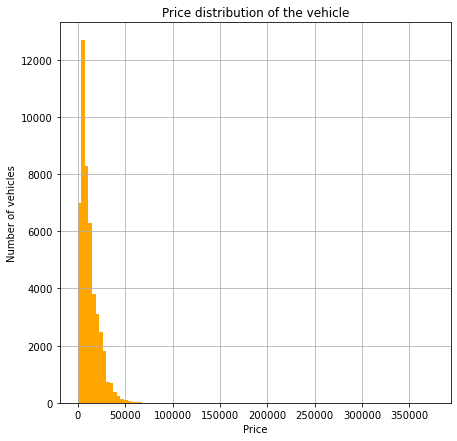

In [272]:
import matplotlib.pyplot as plt
data['price'].hist(figsize=(7,7),bins=100, color="orange")
plt.xlabel("Price")
plt.ylabel("Number of vehicles")
plt.title('Price distribution of the vehicle')

Text(0.5, 1.0, 'Age distribution of the vehicle')

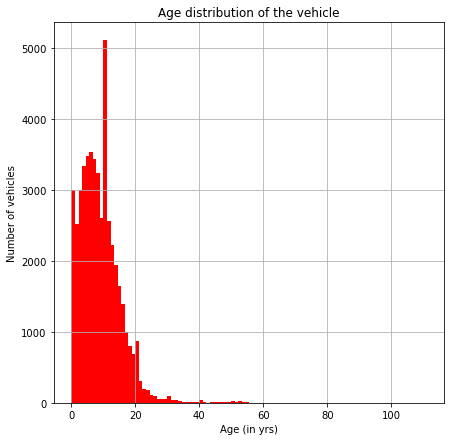

In [273]:
data['vehicle_age'].hist(figsize=(7,7),bins=100, color="red")
plt.xlabel("Age (in yrs)")
plt.ylabel("Number of vehicles")
plt.title('Age distribution of the vehicle')

Text(0.5, 1.0, 'Mileage distribution of the vehicle')

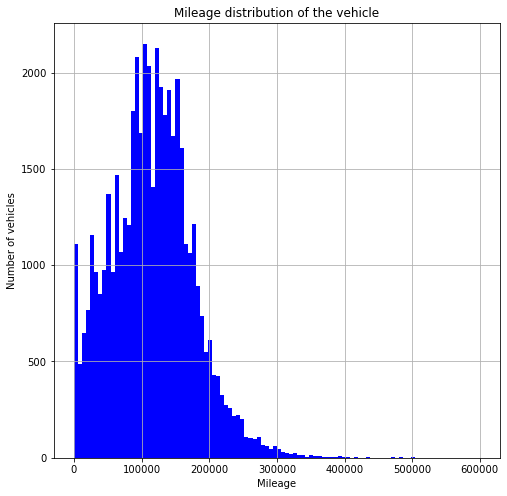

In [274]:
data['odometer'].hist(figsize=(8,8),bins=100, range=(0,600000), color="blue")
plt.xlabel("Mileage")
plt.ylabel("Number of vehicles")
plt.title('Mileage distribution of the vehicle')

Text(0.5, 1.0, 'Cylinders distribution of the vehicle')

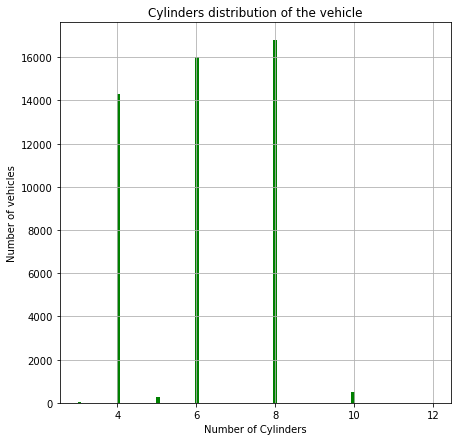

In [275]:
data['cylinders'].hist(figsize=(7,7),bins=100, color="green")
plt.xlabel("Number of Cylinders")
plt.ylabel("Number of vehicles")
plt.title('Cylinders distribution of the vehicle')

Text(0.5, 1.0, 'Condition distribution of the vehicle')

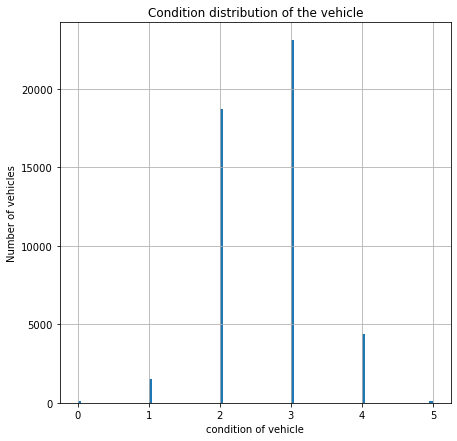

In [276]:
data['condition'].hist(figsize=(7,7),bins=100)
plt.xlabel("condition of vehicle")
plt.ylabel("Number of vehicles")
plt.title('Condition distribution of the vehicle')

- Observing the data distribution above, we can see many outliers especially in price, odometer and age. There seem to be more outliers in upper limit as it is right-skewed distribution (That means more outliers in higher values). Therefore  Now I am going to calculate upper limit outliers and remove them from our dataset.

#### Finding Upper Limit Outliers

In [277]:
price_q1=data['price'].quantile(0.25)
price_q3=data['price'].quantile(0.75)
price_IQR=price_q3-price_q1
price_upperlimit=price_q3 + 1.5 *price_IQR
print("Upper Limit Outlier for Vehicle's 'Price':",price_upperlimit)

odo_q1=data['odometer'].quantile(0.25)
odo_q3=data['odometer'].quantile(0.75)
odo_IQR=odo_q3-odo_q1
odo_upperlimit=odo_q3 + 1.5 *odo_IQR
print("Upper Limit Outlier for Vehicle's 'Odometer':",odo_upperlimit)

age_q1=data['vehicle_age'].quantile(0.25)
age_q3=data['vehicle_age'].quantile(0.75)
age_IQR=age_q3-age_q1
age_upperlimit=age_q3 + 1.5 *age_IQR
print("Upper Limit Outlier for Vehicle's 'Age':",age_upperlimit)

cyl_q1=data['cylinders'].quantile(0.25)
cyl_q3=data['cylinders'].quantile(0.75)
cyl_IQR=cyl_q3-cyl_q1
cyl_upperlimit=cyl_q3 + 1.5 *cyl_IQR
print("Upper Limit Outlier for Vehicle's 'Cylinders':",cyl_upperlimit)



Upper Limit Outlier for Vehicle's 'Price': 34750.0
Upper Limit Outlier for Vehicle's 'Odometer': 273505.375
Upper Limit Outlier for Vehicle's 'Age': 25.0
Upper Limit Outlier for Vehicle's 'Cylinders': 14.0


#### Removing the outliers and store data in a separate DataFrame, and continuing work with the filtered data.

In [278]:

data_no_outliers = data[(data['price'] < price_upperlimit) & (data['vehicle_age'] < age_upperlimit) & (data['odometer'] < odo_upperlimit) & (data['cylinders'] < cyl_upperlimit)]
data_yes_outliers = data[~((data['price'] < price_upperlimit) & (data['vehicle_age'] < age_upperlimit) & (data['odometer'] < odo_upperlimit)& (data['cylinders'] < cyl_upperlimit))]
print(data_no_outliers.shape,data_yes_outliers.shape)

(45056, 18) (2848, 18)


In [279]:
print("We removed", data_yes_outliers.shape[0],"outliers from the dataset.")

We removed 2848 outliers from the dataset.


#### Plotting histogram with filtered dataset

Text(0.5, 1.0, 'Price distribution of the vehicle after removing outliers')

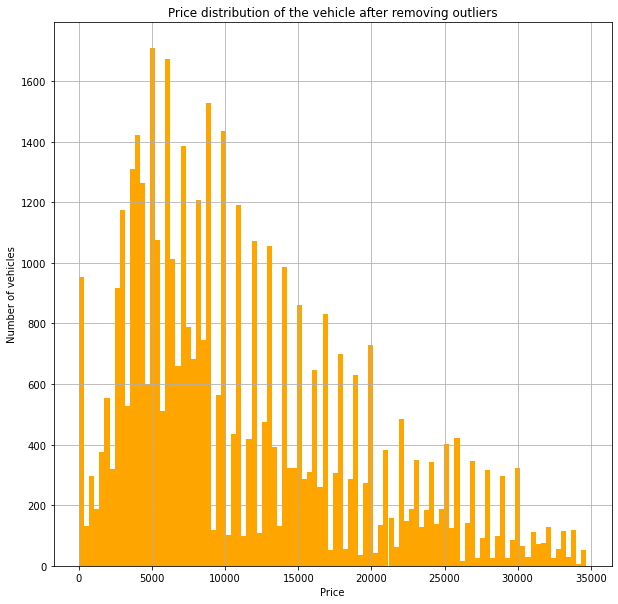

In [280]:
import matplotlib.pyplot as plt
data_no_outliers['price'].hist(figsize=(10,10),bins=100, color="orange")
plt.xlabel("Price")
plt.ylabel("Number of vehicles")
plt.title('Price distribution of the vehicle after removing outliers')

Text(0.5, 1.0, 'Age distribution of the vehicle after removing outliers')

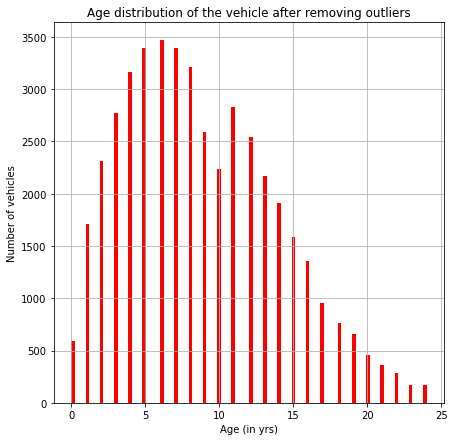

In [281]:
data_no_outliers['vehicle_age'].hist(figsize=(7,7),bins=100, color="red")
plt.xlabel("Age (in yrs)")
plt.ylabel("Number of vehicles")
plt.title('Age distribution of the vehicle after removing outliers')

Text(0.5, 1.0, 'Mileage distribution of the vehicle after removing outliers')

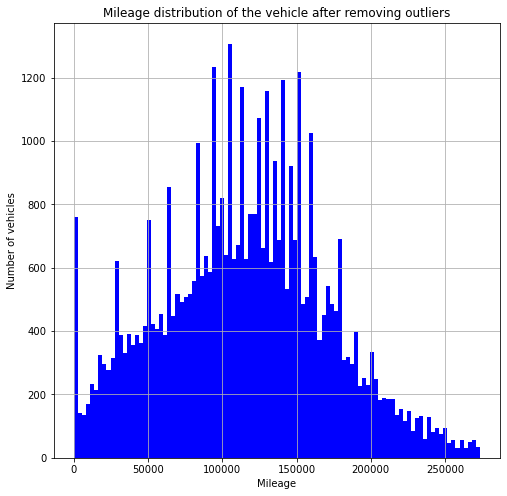

In [282]:
data_no_outliers['odometer'].hist(figsize=(8,8),bins=100, color="blue")
plt.xlabel("Mileage")
plt.ylabel("Number of vehicles")
plt.title('Mileage distribution of the vehicle after removing outliers')

Text(0.5, 1.0, 'Cylinders distribution of the vehicle after removing outliers')

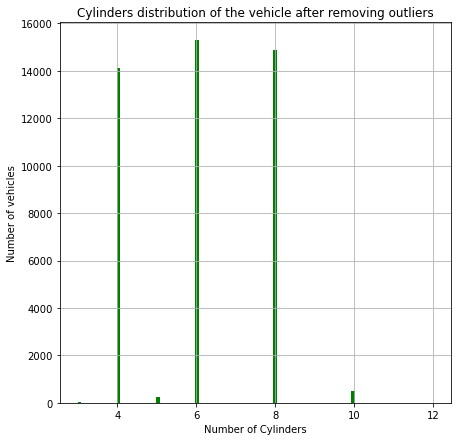

In [283]:
data_no_outliers['cylinders'].hist(figsize=(7,7),bins=100, color="green")
plt.xlabel("Number of Cylinders")
plt.ylabel("Number of vehicles")
plt.title('Cylinders distribution of the vehicle after removing outliers')

Comparing to previous histograms, new one with no outliers look more evenly distributed. For instance,
- Price, vehicle's age and cylinders are right_skewed distribution
- odometer is comb distribution



mean:  39.55930397727273 	median 33.0


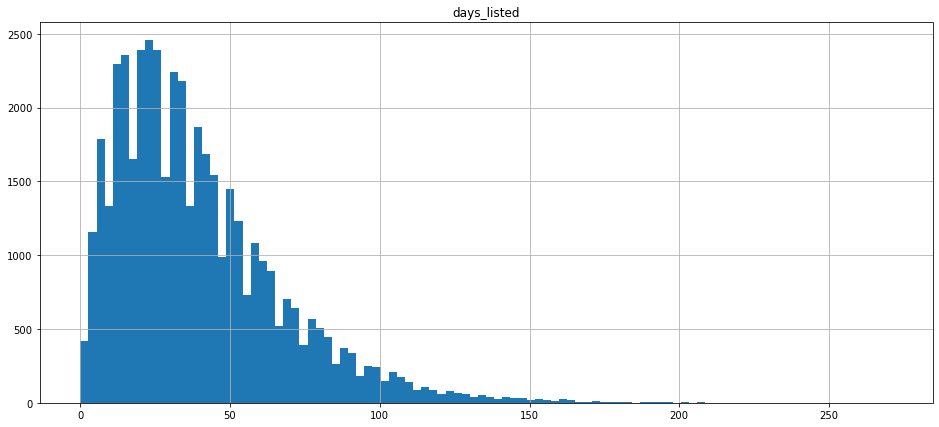

In [284]:
data_no_outliers.hist(column='days_listed', figsize=(16,7), bins=100)
print("mean: ", data_no_outliers['days_listed'].mean(), "\tmedian", data_no_outliers['days_listed'].median())

The ads for vehicles were displayed for 39 mean days and 33 median days. We can say that typically ads were on site for a month in average.

#### Analyzing the number of ads and average price for each type of vehicles

,price
type,
bus,17761.636364
truck,15098.063084


,condition
type,
sedan,11194
SUV,11060


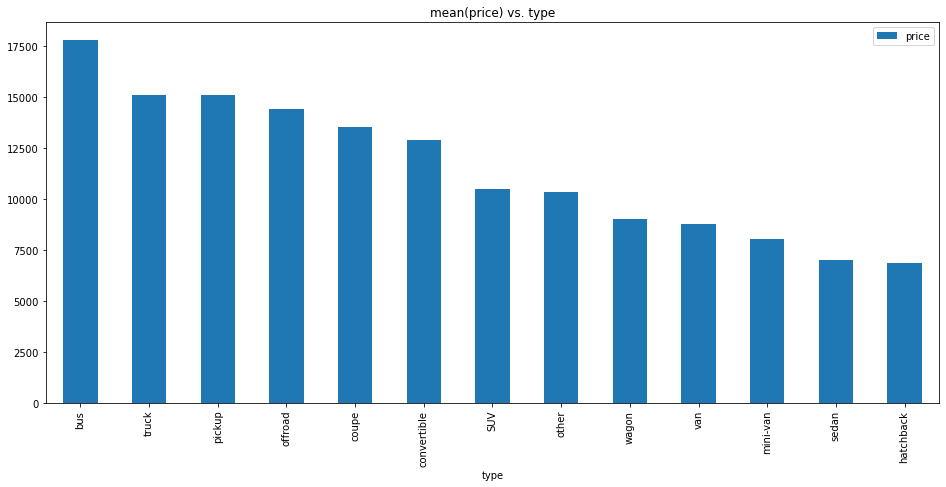

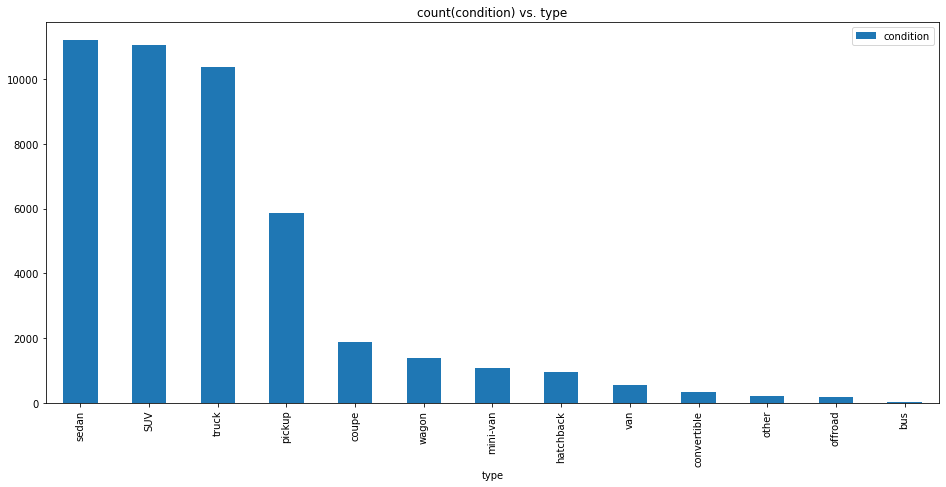

In [285]:
def plot_bar(data, x,y, func):
    title = str(func) + "(" + str(y) + ") vs. " + x
    data_plot = data.pivot_table(index=[x], values=[y], aggfunc=func)
    data_plot.sort_values(by=y, ascending=False).plot(kind='bar',figsize=(16,7),title=title)
    data_new= data_plot.sort_values(by=y, ascending=False).head(2)
    display(data_new)
    return data_new
data_mean_price = plot_bar(data_no_outliers, 'type','price','mean')
data_popular = plot_bar(data_no_outliers,'type','condition','count')

- **Bus** (avg price: 17761) and **Truck** (avg price:15098) are the most expensive vehicles listed.

- **Sedan** (11194) and **SUV** (11060) are most listed vehicles in the website.
- **Bus** are the most expensive and the least listed vehicles.
- **Sedan** are the most listed type vehicle.

#### Number of Ads and average price for each model of vehicles.

,price
model,
chevrolet silverado 1500 crew,28436.770428
ford mustang gt coupe 2d,25062.585106


,condition
model,
ford f-150,2443
chevrolet silverado 1500,1900


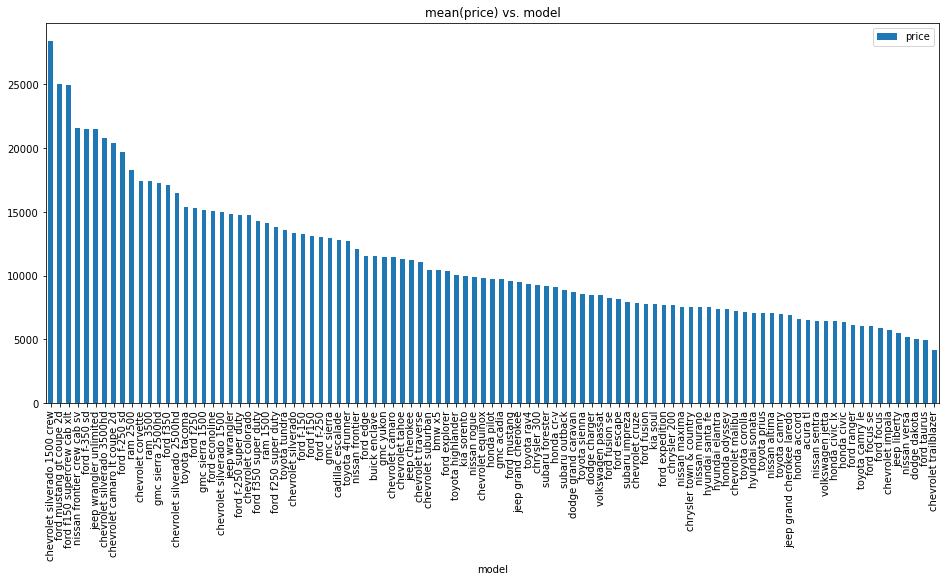

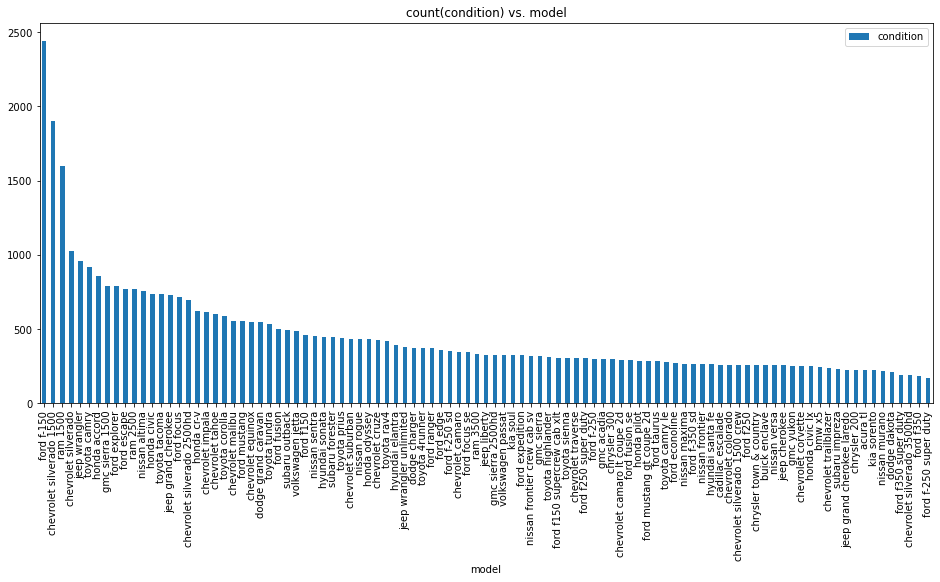

In [286]:
df_mean_price_model = plot_bar(data_no_outliers,'model','price','mean')
df_popular_model = plot_bar(data_no_outliers,'model','condition','count')

- **chevrolet silverado 1500 crew** are the most expensive model of vehicles listed.
- **ford f-150** are the most listed model of vehicle listed.

#### Determining the dependencies of price with other factors

In [287]:
data_popular

,condition
type,
sedan,11194
SUV,11060


#### Studying the Relationship between Price and other Factors for "Sedan"

Text(0.5, 1.0, 'Relationship between Price and Odometer for Sedan')

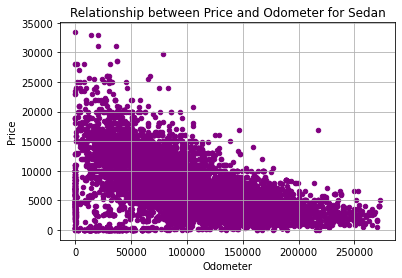

In [288]:
#Filtering out only data with Sedan
sedan_data = data_no_outliers.query('type == "sedan"')

sedan_data.plot.scatter(x='odometer',y='price',grid=True, color='purple')
plt.xlabel("Odometer")
plt.ylabel("Price")
plt.title('Relationship between Price and Odometer for Sedan')

- We see as **odometer** or **mileage** goes up, the prices of the vehicles goes down and vice-versa. So,there is negative correlation between price and odometer for **Sedan**.

Text(0.5, 1.0, 'Relationship between Price and Age for Sedan')

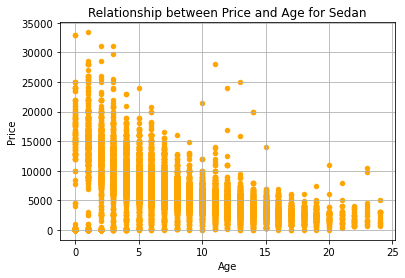

In [289]:
sedan_data.plot.scatter(x='vehicle_age',y='price',grid=True, color='orange')
plt.xlabel("Age")
plt.ylabel("Price")
plt.title('Relationship between Price and Age for Sedan')

- We see as **age** of vehicle increases the **price** of sedan decreases and vice-versa. So,there is negative correlation between **price** and **vehicle_age** for **Sedan**.

Text(0.5, 1.0, 'Relationship between Price and Conditions for Sedan')

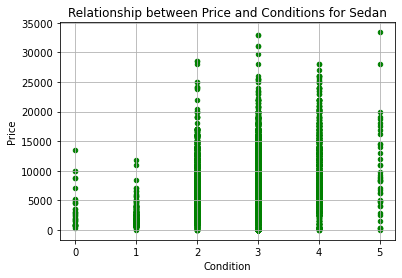

In [290]:
sedan_data.plot.scatter(x='condition',y='price',grid=True, color='green')
plt.xlabel("Condition")
plt.ylabel("Price")
plt.title('Relationship between Price and Conditions for Sedan')

- There is no relationship between price of the vehicle and the condition of vehicle.

In [291]:
sedan_data['transmission'].value_counts()

automatic    10529
manual         541
other          124
Name: transmission, dtype: int64

Text(0.5, 1.0, 'Relationship between Price and Transmission for Sedan')

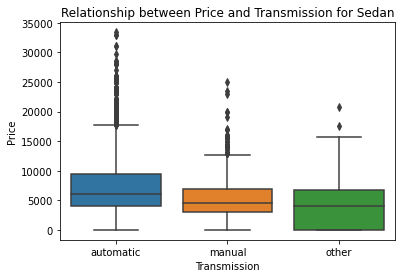

In [292]:
sns.boxplot(x='transmission',y='price', data= sedan_data)
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.title('Relationship between Price and Transmission for Sedan')

- Sedans with automatic transmissions are expensive than sedans with manual and other transmissions.

In [293]:
sedan_data['paint_color'].value_counts()

white     3403
silver    1903
black     1653
grey      1495
blue      1129
red        875
custom     270
brown      234
green      182
purple      23
yellow      19
orange       8
Name: paint_color, dtype: int64

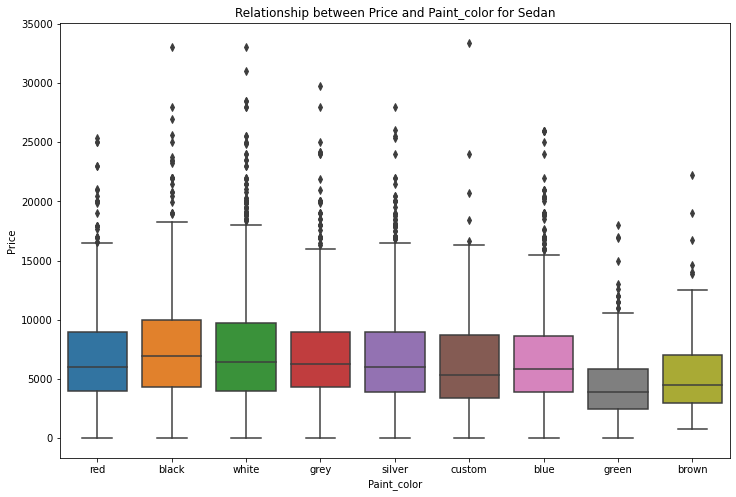

<Figure size 432x288 with 0 Axes>

In [311]:
# Removing purple, yellow and orange from dataset.
sedan_data_50 = sedan_data.query('paint_color != "purple" and paint_color != "orange" and paint_color!="yellow"')
plt.figure();
fig=plt.gcf()
fig.set_size_inches(12,8)
sns.boxplot(x='paint_color',y='price', data= sedan_data_50)
plt.xlabel("Paint_color")
plt.ylabel("Price")
plt.title('Relationship between Price and Paint_color for Sedan')
plt.show()
plt.clf()

- Black cars are slightly expensive than other paint colored cars in general. There are still some expections.

#### Studying the Relationship between Price and other Factors for "SUV"

Text(0.5, 1.0, 'Relationship between Price and Odometer for SUV')

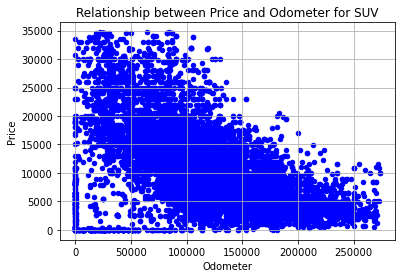

In [312]:
#Filtering out only data with SUV
SUV_data = data_no_outliers.query('type == "SUV"')

SUV_data.plot.scatter(x='odometer',y='price',grid=True, color='blue')
plt.xlabel("Odometer")
plt.ylabel("Price")
plt.title('Relationship between Price and Odometer for SUV')

- We see as **odometer** or **mileage** goes up, the prices of the vehicles goes down and vice-versa. So,there is negative correlation between price and odometer for **SUV**.

Text(0.5, 1.0, 'Relationship between Price and Age for SUV')

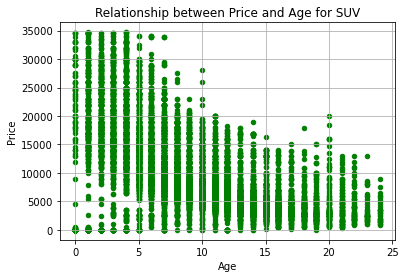

In [313]:
SUV_data.plot.scatter(x='vehicle_age',y='price',grid=True, color='green')
plt.xlabel("Age")
plt.ylabel("Price")
plt.title('Relationship between Price and Age for SUV')

- We see as **age** of vehicle increases the **price** of sedan decreases and vice-versa. That means, older the vehicle, cheaper the price. So,there is negative correlation between **price** and **vehicle_age** for **Sedan**.

Text(0.5, 1.0, 'Relationship between Price and Conditions for SUV')

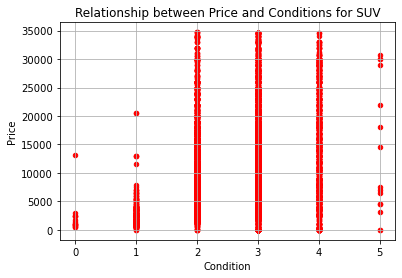

In [314]:
SUV_data.plot.scatter(x='condition',y='price',grid=True, color='red')
plt.xlabel("Condition")
plt.ylabel("Price")
plt.title('Relationship between Price and Conditions for SUV')

- There is no replationship between the **Price** and the **Condition** for SUVs.

In [315]:
SUV_data['transmission'].value_counts()

automatic    10482
manual         428
other          150
Name: transmission, dtype: int64

- I am including all types in whisker-plot as there are more than 50 ads for all transmission types.

Text(0.5, 1.0, 'Relationship between Price and Transmission for SUV')

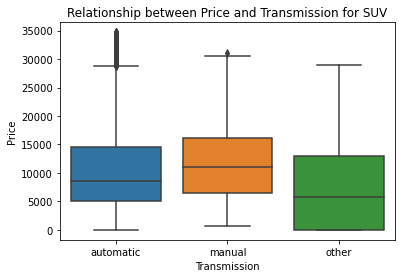

In [316]:
sns.boxplot(x='transmission',y='price', data= SUV_data)
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.title('Relationship between Price and Transmission for SUV')

- Manual SUVs seem to be slightly expensive than auomatic and other transmission SUVs.

In [317]:
SUV_data['paint_color'].value_counts()

white     3726
black     1963
silver    1415
grey      1072
blue       932
red        821
green      387
brown      318
custom     279
orange      70
yellow      40
purple      37
Name: paint_color, dtype: int64

- I am excluding purple color SUVs from the plot as they have less than 50 ads listed in webiste.

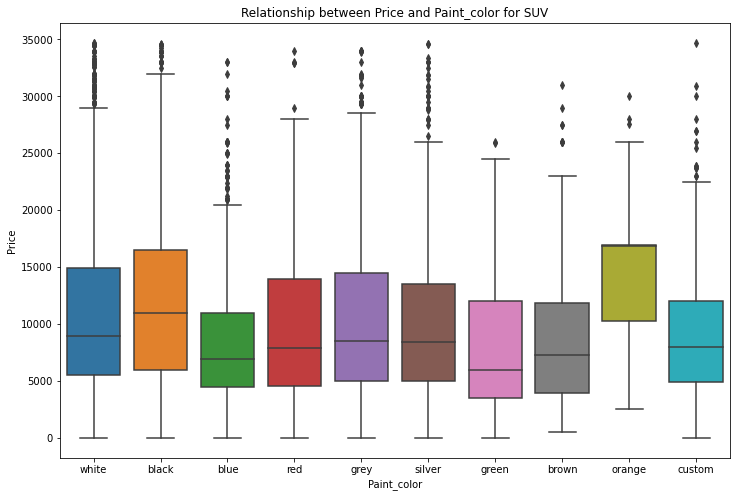

<Figure size 432x288 with 0 Axes>

In [318]:
# Removing purple from dataset.
SUV_data_50 = SUV_data.query('paint_color != "purple" and paint_color != "yellow"')
plt.figure();
fig=plt.gcf()
fig.set_size_inches(12,8)
sns.boxplot(x='paint_color',y='price', data= SUV_data_50)
plt.xlabel("Paint_color")
plt.ylabel("Price")
plt.title('Relationship between Price and Paint_color for SUV')
plt.show()
plt.clf()

- Orange SUVs are expensive than SUVs with other paint colors.

Studying correlation in tabular format.

In [319]:
corr_data1 = sedan_data[['price','odometer','vehicle_age','condition']]
print("Correlation between price and other factors for Sedan")
corr_data1.corr()

Correlation between price and other factors for Sedan


,price,odometer,vehicle_age,condition
price,1.000000,-0.563577,-0.638536,0.292334
odometer,-0.563577,1.000000,0.642169,-0.321832
vehicle_age,-0.638536,0.642169,1.000000,-0.308047
condition,0.292334,-0.321832,-0.308047,1.000000


In [320]:
corr_data = SUV_data[['price','odometer','vehicle_age','condition']]
print("Correlation between price and other factors for SUV")
corr_data.corr()

Correlation between price and other factors for SUV


,price,odometer,vehicle_age,condition
price,1.000000,-0.523136,-0.602239,0.260957
odometer,-0.523136,1.000000,0.648022,-0.320232
vehicle_age,-0.602239,0.648022,1.000000,-0.319171
condition,0.260957,-0.320232,-0.319171,1.000000


We can draw the same conclusion studying the correlation in the table and the graphs above:

#### SUV
- There is no correlation between price and condition.
- There is a negative correlation between price and odometer. That means, as mileage of vehicle increases, price decreases and vice-verca.
- There is a negative correlation between vehicle age and price. That means, as car's age increases, the price decreases and vice-verca.
- Manual SUVs seem to be slightly expensive than auomatic and other transmission SUVs.
- Orange SUVs are expensive than SUVs with other paint colors..


#### Sedan
- There is no correlation between price and condition.
- There is a negative correlation between price and odometer. That means, as mileage of vehicle increases, price decreases and vice-verca.
- There is a negative correlation between vehicle age and price. That means, as car's age increases, the price decreases and vice-verca.
- Sedans with automatic transmission are expensive than Sedans with manual and other transmissions.
- Black sedans are expensive than sedans with other paint colors.

# Step 5. Overall Conclusion

#### Handing Missing Values:
1. I filled in missing values in **is_4wd** column with **0** as there are 2 possible values 0 or 1 in boolean datatype.
2. I filled in missing values in **paint_color** column with random color generated from among the colors we have in **paint_color** dataset. As paint color is not very important factor in this analysis, filling in random values will not make much affect in our final analysis.
3. I filled in missing values in **cylinders** with **Mode** value which is most repeated values. I grouped the cars by models and used most frequent cylinder in each model to fill in missing values.
4. I dropped missing values in **model_year** column as there were 7% of missing values assuming that deleting 7% of missing values does not affect our final analysis.
5. I will fill in missing values in **odometer** column after calculating **vehicle's age** in next step.

#### Converting Datatypes:
I converted the datatypes in following columns:

- **model_year** and **date_posted** to datetime datatype
- **cylinders** into int32
- **is_4wd** into Boolean

#### Performing calculations and adding new columns to the table and filling in Missing values and Changing datatypes to final dataset
1. I added the following columns in the dataset:
- Day of the week, month, and year the ad was placed
- The vehicle's age (in years) when the ad was placed
- The vehicle's average mileage per year
2. I filled in missing values in odometer by mean value of odometer grouped by vehicle's age
3. In the condition column, I replaceed string values with a numeric scale:
- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0
4. Finally changed some column's datatypes into appropriate format 
- **vehicle's age** from float to integer
- **odometer** from float to integer
- **condition** from float to integer

#### Exploratory Data Analysis
1. Following were the Upper Limit Outliers:
- Upper Limit Outlier for Vehicle's 'Price': 34750.0
- Upper Limit Outlier for Vehicle's 'Odometer': 273505.375
- Upper Limit Outlier for Vehicle's 'Age': 25.0
- Upper Limit Outlier for Vehicle's 'Cylinders': 14.0

2. Removed **2848** outliers from the dataset.

3. The new histograms with filtered data omiting outliers looked more evenly distributed. For instance,
- Price and vehicle age are right_skewed distribution
- odometer is comb distribution
- condition are normal distribution
- cylinders is plateau distribution

4. The ads for vehicles were displayed for 39 mean days and 33 median days. We can say that typically ads were on site for a month in average.

5. Most listed type and most expensive type of vehicles:
- **Bus** (avg price: 17761) and **Truck** (avg price:15098) are the most expensive vehicles listed.

- **Sedan** (11194) and **SUV** (11060) are most listed vehicles in the website.
- **Bus** are the most expensive and the least listed vehicles.
- **Sedan** are the most listed type vehicle.

6. Most listed model and most expensice model of vehicles:
- **chevrolet silverado 1500 crew** are the most expensive model of vehicles listed.
- **ford f-150** are the most listed model of vehicle listed.

7. Dependencies of price with other factors for 2 Most popular vehicles Listed

#### SUV
- There is no correlation between price and condition.
- There is a negative correlation between price and odometer. That means, as mileage of vehicle increases, price decreases and vice-verca.
- There is a negative correlation between vehicle age and price. That means, as car's age increases, the price decreases and vice-verca.
- Manual SUVs seem to be slightly expensive than auomatic and other transmission SUVs.
- Orange SUVs are expensive than SUVs with other paint colors..


#### Sedan
- There is no correlation between price and condition.
- There is a negative correlation between price and odometer. That means, as mileage of vehicle increases, price decreases and vice-verca.
- There is a negative correlation between vehicle age and price. That means, as car's age increases, the price decreases and vice-verca.
- Sedans with automatic transmission are expensive than Sedans with manual and other transmissions.
- Black sedans are slightly expensive than sedans with other paint colors.